In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, plot_roc_curve, confusion_matrix, plot_confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier

# Data Pre-processing and Feature Preparation

In [2]:
# Import dataset
data_orig = pd.read_csv('Project_Data_EE4C12_SET_PV.csv')
data_orig

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Fault_Type
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,0
...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,3
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,3
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,3
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,3


In [3]:
# Dataset transformation using one-hot encoding for multi-class classification

data = data_orig.drop('Fault_Type', axis=1) # remove the ordinary encoding column
data['Healthy'] = np.where(data_orig['Fault_Type'] == 0, 1, 0)
data['Short_Circuit'] = np.where(data_orig['Fault_Type'] == 1, 1, 0)
data['Broken_Cells'] = np.where(data_orig['Fault_Type'] == 2, 1, 0)
data['Broken_Strings'] = np.where(data_orig['Fault_Type'] == 3, 1, 0)
data

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Healthy,Short_Circuit,Broken_Cells,Broken_Strings
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,1,0,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,1,0,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,1,0,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,1,0,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,0,0,0,1
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,0,0,0,1
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,0,0,0,1
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,0,0,0,1


In [4]:
print('Dataset dimention: ', data.shape)
if data.isnull().values.any():
    print('Some values are missing')
else:
    print('Noo missing values')

Dataset dimention:  (12000, 11)
Noo missing values


In [5]:
# Training-testing sets split: from now on the testing set must not be part of any operation, in order to prevent data leak

training_set, testing_set = train_test_split(data, test_size=0.15, random_state=4720)

X_training = training_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
y_2c_training = training_set['System_Status']
y_mc_training = training_set[['Healthy', 'Short_Circuit', 'Broken_Cells', 'Broken_Strings']]

X_test = testing_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
y_2c_test = testing_set['System_Status']
y_mc_test = testing_set[['Healthy', 'Short_Circuit', 'Broken_Cells', 'Broken_Strings']]


In [6]:
#training_set

In [7]:
#testing_set

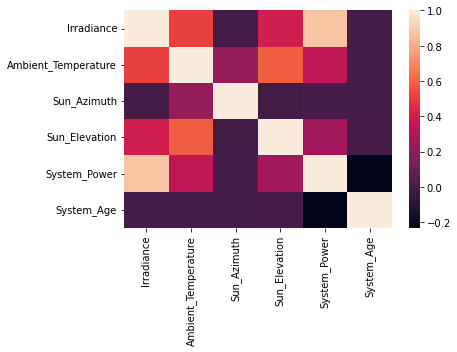

In [8]:
# Correlation matrix
corr_matrix = X_training.corr()
sn.heatmap(corr_matrix)
plt.show()

In [9]:
corr_matrix

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age
Irradiance,1.000000,0.511216,-0.008649,0.399027,0.873820,-0.008066
Ambient_Temperature,0.511216,1.000000,0.230825,0.586162,0.349092,-0.007345
Sun_Azimuth,-0.008649,0.230825,1.000000,-0.010084,-0.002593,-0.009596
Sun_Elevation,0.399027,0.586162,-0.010084,1.000000,0.266748,0.003457
System_Power,0.873820,0.349092,-0.002593,0.266748,1.000000,-0.231275
System_Age,-0.008066,-0.007345,-0.009596,0.003457,-0.231275,1.000000


In [10]:
# Scaling of the features

scaler = StandardScaler()
scaler.fit(X_training)
X_training_scaled = scaler.transform(X_training)

In [11]:
# Split for binary classification

X_train, X_val, y_train, y_val = train_test_split(X_training_scaled, y_2c_training, test_size=0.15, random_state=4720)

In [12]:
# Polynomial features

pol = PolynomialFeatures(degree=2)
pol.fit(X_train)
X_train_pol = pol.transform(X_train)
X_val_pol = pol.transform(X_val)

# Binary Classification

## Logistic Regression

In [29]:
# Logistic Regression with original features
lr_lin = LogisticRegression(max_iter=1000)
lr_lin.fit(X_train, y_train)
y_pred = lr_lin.predict(X_val)

In [30]:
print("Logistic Regression accuracy with original features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Logistic Regression recall with original features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Logistic Regression precision with original features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Logistic Regression f1-score with original features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, lr_lin.predict(X_train))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Logistic Regression accuracy with original features: 0.6856
Logistic Regression recall with original features: 0.6824
Logistic Regression precision with original features: 0.6851
Logistic Regression f1-score with original features: 0.6838
Overfitting percentage: -1.13%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


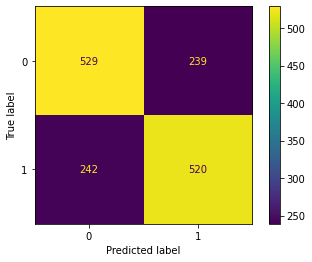

In [31]:
plot_confusion_matrix(lr_lin, X_val, y_val)

In [32]:
# Logistic Regression with polynomial features
lr_pol = LogisticRegression(max_iter=1000)
lr_pol.fit(X_train_pol, y_train)
y_pred = lr_pol.predict(X_val_pol)

In [33]:
print("Logistic Regression accuracy with polynomial features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Logistic Regression recall with polynomial features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Logistic Regression precision with polynomial features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Logistic Regression f1-score with polynomial features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, lr_pol.predict(X_train_pol))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Logistic Regression accuracy with polynomial features: 0.7712
Logistic Regression recall with polynomial features: 0.7113
Logistic Regression precision with polynomial features: 0.8065
Logistic Regression f1-score with polynomial features: 0.7559
Overfitting percentage: -2.58%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


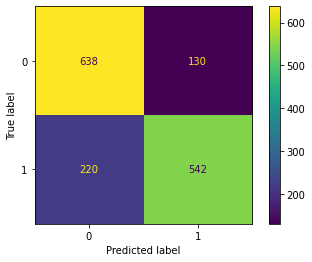

In [34]:
plot_confusion_matrix(lr_pol, X_val_pol, y_val)

## SVC

In [35]:
# Linear SVC with original features
svm_lin1 = SVC(kernel='linear')
svm_lin1.fit(X_train, y_train)
y_pred = svm_lin1.predict(X_val)

In [36]:
print("Linear SVM accuracy with original features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Linear SVM recall with original features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Linear SVM precision with original features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Linear SVM f1-score with original features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_lin1.predict(X_train))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Linear SVM accuracy with original features: 0.6915
Linear SVM recall with original features: 0.6601
Linear SVM precision with original features: 0.7025
Linear SVM f1-score with original features: 0.6806
Overfitting percentage: -2.26%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


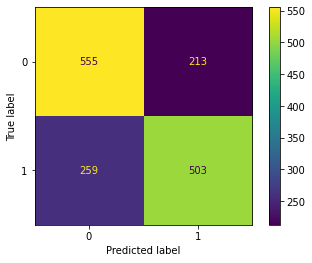

In [37]:
plot_confusion_matrix(svm_lin1, X_val, y_val)

In [38]:
# Linear SVC with polynomial features
svm_lin2 = SVC(kernel='linear')
svm_lin2.fit(X_train_pol, y_train)
y_pred = svm_lin2.predict(X_val_pol)

In [39]:
print("Linear SVM accuracy with polynomial features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Linear SVM recall with polynomial features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Linear SVM precision with polynomial features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Linear SVM f1-score with polynomial features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_lin2.predict(X_train_pol))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Linear SVM accuracy with polynomial features: 0.7634
Linear SVM recall with polynomial features: 0.6614
Linear SVM precision with polynomial features: 0.8289
Linear SVM f1-score with polynomial features: 0.7358
Overfitting percentage: -0.71%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


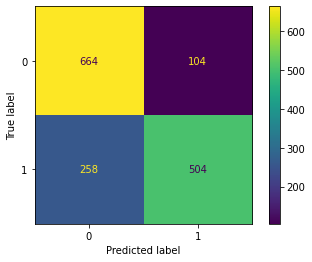

In [40]:
plot_confusion_matrix(svm_lin2, X_val_pol, y_val)

In [41]:
# Gaussian SVC with original features
svm_gauss1 = SVC(kernel='rbf')
svm_gauss1.fit(X_train, y_train)
y_pred = svm_gauss1.predict(X_val)

In [42]:
print("Gaussian SVM accuracy with original features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Gaussian SVM recall with original features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Gaussian SVM precision with original features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Gaussian SVM f1-score with original features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_gauss1.predict(X_train))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Gaussian SVM accuracy with original features: 0.7542
Gaussian SVM recall with original features: 0.6194
Gaussian SVM precision with original features: 0.8459
Gaussian SVM f1-score with original features: 0.7152
Overfitting percentage: 0.13%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


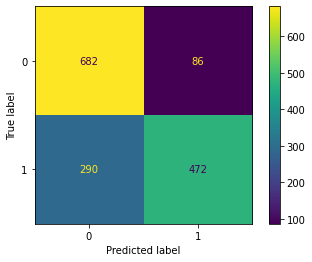

In [43]:
plot_confusion_matrix(svm_gauss1, X_val, y_val)

In [44]:
# Gaussian SVC with polynomial features
svm_gauss2 = SVC(kernel='rbf')
svm_gauss2.fit(X_train_pol, y_train)
y_pred = svm_gauss2.predict(X_val_pol)

In [45]:
print("Gaussian SVM accuracy with polynomial features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Gaussian SVM recall with polynomial features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Gaussian SVM precision with polynomial features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Gaussian SVM f1-score with polynomial features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_gauss2.predict(X_train_pol))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Gaussian SVM accuracy with polynomial features: 0.7471
Gaussian SVM recall with polynomial features: 0.5958
Gaussian SVM precision with polynomial features: 0.8518
Gaussian SVM f1-score with polynomial features: 0.7012
Overfitting percentage: 1.25%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


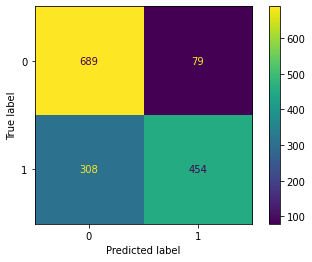

In [46]:
plot_confusion_matrix(svm_gauss2, X_val_pol, y_val)

## Weighted SVC

In [47]:
# Weighted Linear SVC with original features
weights = {0: 0.98, 1: 1.02}
svm_lin1_w = SVC(kernel='linear', class_weight=weights)
svm_lin1_w.fit(X_train, y_train)
y_pred = svm_lin1_w.predict(X_val)

In [48]:
print("Weighted Linear SVM accuracy with original features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Weighted Linear SVM recall with original features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Weighted Linear SVM precision with original features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Weighted Linear SVM f1-score with original features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_lin1_w.predict(X_train))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Weighted Linear SVM accuracy with original features: 0.6817
Weighted Linear SVM recall with original features: 0.6745
Weighted Linear SVM precision with original features: 0.6826
Weighted Linear SVM f1-score with original features: 0.6785
Overfitting percentage: -1.22%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


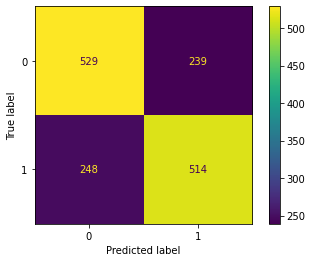

In [49]:
plot_confusion_matrix(svm_lin1_w, X_val, y_val)

In [50]:
# Weighted Linear SVC with polynomial features
weights = {0: 0.92, 1: 1.08}
svm_lin2_w = SVC(kernel='linear', class_weight=weights)
svm_lin2_w.fit(X_train_pol, y_train)
y_pred = svm_lin2_w.predict(X_val_pol)

In [51]:
print("Weighted Linear SVM accuracy with polynomial features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Weighted Linear SVM recall with polynomial features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Weighted Linear SVM precision with polynomial features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Weighted Linear SVM f1-score with polynomial features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_lin2_w.predict(X_train_pol))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Weighted Linear SVM accuracy with polynomial features: 0.7634
Weighted Linear SVM recall with polynomial features: 0.7270
Weighted Linear SVM precision with polynomial features: 0.7825
Weighted Linear SVM f1-score with polynomial features: 0.7537
Overfitting percentage: -1.75%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


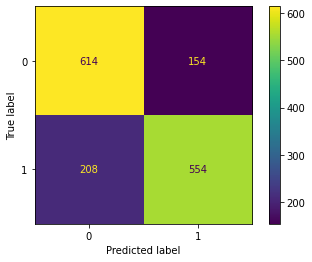

In [52]:
plot_confusion_matrix(svm_lin2_w, X_val_pol, y_val)

In [53]:
# Weighted Gaussian SVC with original features
weights = {0: 0.90, 1: 1.1}
svm_gauss1_w = SVC(kernel='rbf', class_weight=weights)
svm_gauss1_w.fit(X_train, y_train)
y_pred = svm_gauss1_w.predict(X_val)

In [54]:
print("Weighted Gaussian SVM accuracy with original features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Weighted Gaussian SVM recall with original features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Weighted Gaussian SVM precision with original features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Weighted Gaussian SVM f1-score with original features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_gauss1_w.predict(X_train))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Weighted Gaussian SVM accuracy with original features: 0.7490
Weighted Gaussian SVM recall with original features: 0.7795
Weighted Gaussian SVM precision with original features: 0.7333
Weighted Gaussian SVM f1-score with original features: 0.7557
Overfitting percentage: -0.60%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


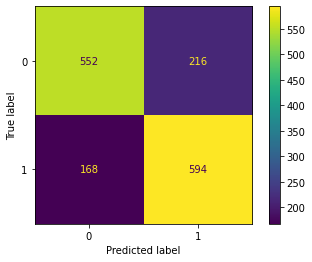

In [55]:
plot_confusion_matrix(svm_gauss1_w, X_val, y_val)

In [56]:
# Weighted Gaussian SVC with polynomial features
weights = {0: 0.90, 1: 1.1}
svm_gauss2_w = SVC(kernel='rbf', class_weight=weights)
svm_gauss2_w.fit(X_train_pol, y_train)
y_pred = svm_gauss2_w.predict(X_val_pol)

In [58]:
print("Gaussian SVM accuracy with polynomial features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Gaussian SVM recall with polynomial features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Gaussian SVM precision with polynomial features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Gaussian SVM f1-score with polynomial features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_gauss2_w.predict(X_train_pol))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Gaussian SVM accuracy with polynomial features: 0.7353
Gaussian SVM recall with polynomial features: 0.7454
Gaussian SVM precision with polynomial features: 0.7291
Gaussian SVM f1-score with polynomial features: 0.7372
Overfitting percentage: 1.88%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


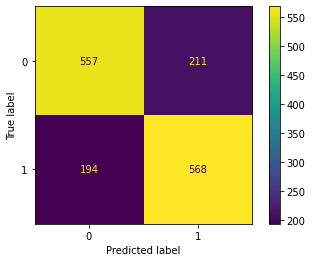

In [59]:
plot_confusion_matrix(svm_gauss2_w, X_val_pol, y_val)

## SVC Hyper Parameters Tuning

## <font color='red'>HEAVY!!!</font>

In [112]:
# Hyper Parameters tuning for Weighted Linear SVC with original features
C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
weights = {0: 0.98, 1: 1.02}
accuracy = []
for C in C_list:
    svm_lin1_w = SVC(kernel='linear', C=C, class_weight=weights)
    svm_lin1_w.fit(X_train, y_train)
    y_pred = svm_lin1_w.predict(X_val)
    print("Accuracy with C=" + str(C) + " : {:.4f}".format(accuracy_score(y_val, y_pred)))
    accuracy.append([C, accuracy_score(y_val, y_pred)])

Accuracy with C=0.001 : 0.6307
Accuracy with C=0.01 : 0.6601
Accuracy with C=0.1 : 0.6778
Accuracy with C=1 : 0.6817
Accuracy with C=10 : 0.6843
Accuracy with C=100 : 0.6843
Accuracy with C=1000 : 0.6837


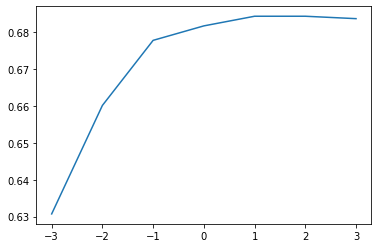

In [113]:
plt.plot(np.array(np.log10(accuracy))[:, 0], np.array(accuracy)[:, 1])

In [114]:
weights = {0: 0.98, 1: 1.02}
svm_lin1_w = SVC(kernel='linear', C=10, class_weight=weights)
svm_lin1_w.fit(X_train, y_train)
y_pred = svm_lin1_w.predict(X_val)

In [115]:
print("Weighted Linear SVM accuracy with original features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Weighted Linear SVM recall with original features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Weighted Linear SVM precision with original features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Weighted Linear SVM f1-score with original features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_lin2_w.predict(X_train_pol))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Weighted Linear SVM accuracy with original features: 0.6843
Weighted Linear SVM recall with original features: 0.6759
Weighted Linear SVM precision with original features: 0.6858
Weighted Linear SVM f1-score with original features: 0.6808
Overfitting percentage: 9.41%


## <font color='red'>HEAVY!!!</font>

In [14]:
# Hyper Parameters tuning for Weighted Linear SVC with polynomial features
#C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_list = np.linspace(start=0.4, stop=0.6, num=10)
weights = {0: 0.92, 1: 1.08}
accuracy = []
for C in C_list:
    svm_lin2_w = SVC(kernel='linear', C=C, class_weight=weights)
    svm_lin2_w.fit(X_train_pol, y_train)
    y_pred = svm_lin2_w.predict(X_val_pol)
    print("Accuracy with C=" + str(C) + " : {:.4f}".format(accuracy_score(y_val, y_pred)))
    accuracy.append([C, accuracy_score(y_val, y_pred)])

Accuracy with C=0.4 : 0.7654
Accuracy with C=0.4222222222222222 : 0.7647
Accuracy with C=0.4444444444444445 : 0.7654
Accuracy with C=0.4666666666666667 : 0.7667
Accuracy with C=0.4888888888888889 : 0.7673
Accuracy with C=0.5111111111111111 : 0.7673
Accuracy with C=0.5333333333333333 : 0.7673
Accuracy with C=0.5555555555555556 : 0.7673
Accuracy with C=0.5777777777777777 : 0.7673
Accuracy with C=0.6 : 0.7660


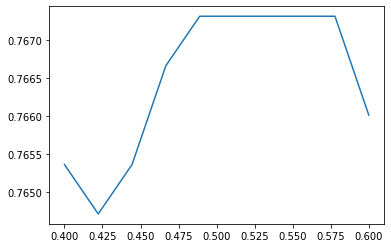

In [15]:
plt.plot(np.array(accuracy)[:, 0], np.array(accuracy)[:, 1])

In [16]:
weights = {0: 0.92, 1: 1.08}
svm_lin2_w = SVC(kernel='linear', C=0.5, class_weight=weights)
svm_lin2_w.fit(X_train_pol, y_train)
y_pred = svm_lin2_w.predict(X_val_pol)

In [17]:
print("Weighted Linear SVM accuracy with polynomial features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Weighted Linear SVM recall with polynomial features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Weighted Linear SVM precision with polynomial features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Weighted Linear SVM f1-score with polynomial features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_lin2_w.predict(X_train_pol))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Weighted Linear SVM accuracy with polynomial features: 0.7673
Weighted Linear SVM recall with polynomial features: 0.7441
Weighted Linear SVM precision with polynomial features: 0.7788
Weighted Linear SVM f1-score with polynomial features: 0.7611
Overfitting percentage: -2.43%


## <font color='red'>HEAVY!!!</font>

In [89]:
# Hyper Parameters tuning for Weighted Gaussian SVC with original features
#C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_list = np.linspace(start=1100, stop=1300, num=10)
weights = {0: 0.90, 1: 1.1}
accuracy = []
for C in C_list:
    svm_gauss1_w = SVC(kernel='rbf', C=C, class_weight=weights)
    svm_gauss1_w.fit(X_train, y_train)
    y_pred = svm_gauss1_w.predict(X_val)
    print("Accuracy with C=" + str(C) + " : {:.4f}".format(accuracy_score(y_val, y_pred)))
    accuracy.append([C, accuracy_score(y_val, y_pred)])

Accuracy with C=1100.0 : 0.8248
Accuracy with C=1122.2222222222222 : 0.8248
Accuracy with C=1144.4444444444443 : 0.8255
Accuracy with C=1166.6666666666667 : 0.8275
Accuracy with C=1188.888888888889 : 0.8275
Accuracy with C=1211.111111111111 : 0.8281
Accuracy with C=1233.3333333333333 : 0.8275
Accuracy with C=1255.5555555555557 : 0.8275
Accuracy with C=1277.7777777777778 : 0.8268
Accuracy with C=1300.0 : 0.8261


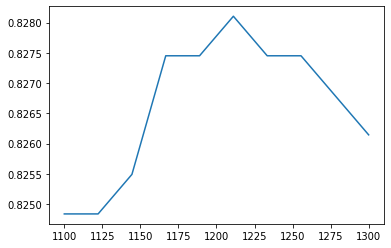

In [90]:
plt.plot(np.array(accuracy)[:, 0], np.array(accuracy)[:, 1])

In [91]:
weights = {0: 0.90, 1: 1.1}
svm_gauss1_w = SVC(kernel='rbf', C=1210, class_weight=weights)
svm_gauss1_w.fit(X_train, y_train)
y_pred = svm_gauss1_w.predict(X_val)

In [92]:
print("Weighted Gaussian SVM accuracy with original features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Weighted Gaussian SVM recall with original features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Weighted Gaussian SVM precision with original features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Weighted Gaussian SVM f1-score with original features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_lin2_w.predict(X_train_pol))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Weighted Gaussian SVM accuracy with original features: 0.8281
Weighted Gaussian SVM recall with original features: 0.8097
Weighted Gaussian SVM precision with original features: 0.8395
Weighted Gaussian SVM f1-score with original features: 0.8243
Overfitting percentage: -9.59%


## <font color='red'>HEAVY!!!</font>

In [117]:
# Hyper Parameters tuning for Weighted Gaussian SVC with polynomial features
#C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_list = np.linspace(start=400, stop=600, num=10)
weights = {0: 0.90, 1: 1.1}
accuracy = []
for C in C_list:
    svm_gauss2_w = SVC(kernel='rbf', C=C, class_weight=weights)
    svm_gauss2_w.fit(X_train_pol, y_train)
    y_pred = svm_gauss2_w.predict(X_val_pol)
    print("Accuracy with C=" + str(C) + " : {:.4f}".format(accuracy_score(y_val, y_pred)))
    accuracy.append([C, accuracy_score(y_val, y_pred)])

Accuracy with C=400.0 : 0.8131
Accuracy with C=422.22222222222223 : 0.8170
Accuracy with C=444.44444444444446 : 0.8183
Accuracy with C=466.66666666666663 : 0.8190
Accuracy with C=488.8888888888889 : 0.8203
Accuracy with C=511.1111111111111 : 0.8203
Accuracy with C=533.3333333333333 : 0.8203
Accuracy with C=555.5555555555555 : 0.8196
Accuracy with C=577.7777777777778 : 0.8190
Accuracy with C=600.0 : 0.8183


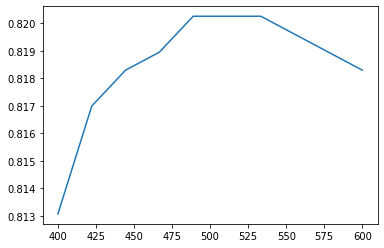

In [118]:
plt.plot(np.array(accuracy)[:, 0], np.array(accuracy)[:, 1])

In [119]:
weights = {0: 0.90, 1: 1.1}
svm_gauss2_w = SVC(kernel='rbf', C=500, class_weight=weights)
svm_gauss2_w.fit(X_train_pol, y_train)
y_pred = svm_gauss2_w.predict(X_val_pol)

In [120]:
print("Weighted Gaussian SVM accuracy with polynomial features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Weighted Gaussian SVM recall with polynomial features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Weighted Gaussian SVM precision with polynomial features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Weighted Gaussian SVM f1-score with polynomial features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_lin2_w.predict(X_train_pol))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Weighted Gaussian SVM accuracy with polynomial features: 0.8203
Weighted Gaussian SVM recall with polynomial features: 0.8097
Weighted Gaussian SVM precision with polynomial features: 0.8260
Weighted Gaussian SVM f1-score with polynomial features: 0.8178
Overfitting percentage: -8.73%


## Random Forest Model

In [136]:
# Random Forest with number of estimators optimization (original dataset)

N_est = list(range(50, 260, 10))
accuracy = []
for N in N_est:
    rfc = RandomForestClassifier(n_estimators=N)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_val)
    print("Accuracy with N=" + str(N) + " : {:.4f}".format(accuracy_score(y_val, y_pred)))
    accuracy.append([N, accuracy_score(y_val, y_pred)])

Accuracy with N=50 : 0.7810
Accuracy with N=60 : 0.7752
Accuracy with N=70 : 0.7889
Accuracy with N=80 : 0.7843
Accuracy with N=90 : 0.7810
Accuracy with N=100 : 0.7843
Accuracy with N=110 : 0.7882
Accuracy with N=120 : 0.7850
Accuracy with N=130 : 0.7837
Accuracy with N=140 : 0.7837
Accuracy with N=150 : 0.7837
Accuracy with N=160 : 0.7889
Accuracy with N=170 : 0.7869
Accuracy with N=180 : 0.7856
Accuracy with N=190 : 0.7850
Accuracy with N=200 : 0.7850
Accuracy with N=210 : 0.7895
Accuracy with N=220 : 0.7830
Accuracy with N=230 : 0.7928
Accuracy with N=240 : 0.7843
Accuracy with N=250 : 0.7948


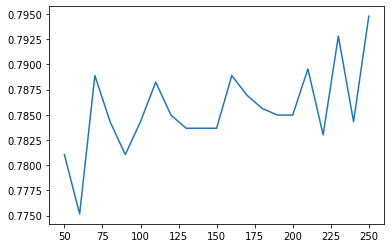

In [137]:
# Actually, there are no big changes as we increase the number of trees (note that the model has some randomness)
plt.plot(np.array(accuracy)[:, 0], np.array(accuracy)[:, 1])

In [138]:
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

In [139]:
print("Random Forest accuracy with original features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Random Forest recall with original features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Random Forest precision with original features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Random Forest f1-score with original features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, svm_gauss2_w.predict(X_train_pol))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Random Forest accuracy with original features: 0.7889
Random Forest recall with original features: 0.7769
Random Forest precision with original features: 0.7946
Random Forest f1-score with original features: 0.7857
Overfitting percentage: 10.93%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


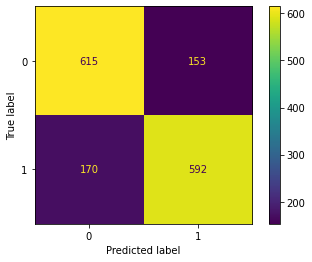

In [140]:
plot_confusion_matrix(rfc, X_val, y_val)

## K-fold Cross Validation

## <font color='red'>HEAVY!!!</font>

In [160]:
# Create the K splits with StratifiedKFold() to preserve the classes ratio in the split
cv = StratifiedKFold(n_splits=5, shuffle=True)
# Compute the K-fold Cross Validation Accuracy for all the models
models = [lr_lin, lr_pol, svm_lin1_w, svm_lin2_w, svm_gauss1_w, svm_gauss2, rfc]
accuracy_list = []
for model in models:
    scores = cross_val_score(model, X_training_scaled, y_2c_training, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    accuracy_list.append(np.mean(scores))

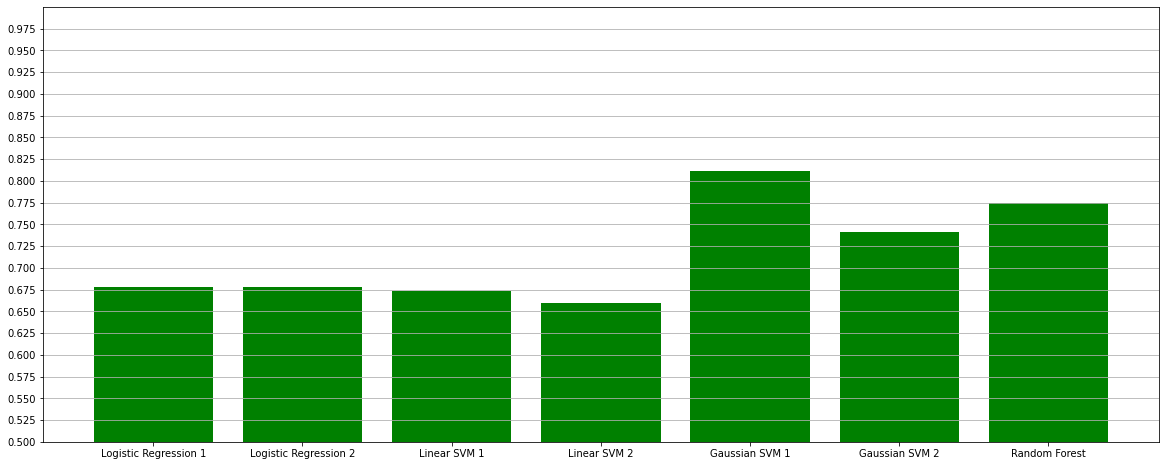

In [161]:
model_names = ['Logistic Regression 1', 'Logistic Regression 2', 'Linear SVM 1', 'Linear SVM 2', 
               'Gaussian SVM 1', 'Gaussian SVM 2', 'Random Forest']
plt.figure(figsize=(20, 8))
plt.bar(model_names, accuracy_list, color='green')
plt.ylim(0.5, 1.0)
plt.yticks(np.arange(0.5, 1.0, 0.025))
plt.grid(axis='y')

## Bagging on the best model (Gaussian SVM with original features) 

## <font color='red'>HEAVY!!!</font>

In [29]:
bagging_SVM = BaggingClassifier(base_estimator=SVC(kernel='rbf', C=1210, class_weight={0: 0.90, 1: 1.1}), 
                                n_estimators=100, random_state=4720, n_jobs=-1)
bagging_SVM.fit(X_train, y_train)
y_pred = bagging_SVM.predict(X_val)

In [30]:
print("Bagging SVM accuracy with original features: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Bagging SVM recall with original features: {:.4f}".format(recall_score(y_val, y_pred)))
print("Bagging SVM precision with original features: {:.4f}".format(precision_score(y_val, y_pred)))
print("Bagging SVM f1-score with original features: {:.4f}".format(f1_score(y_val, y_pred)))
overfitting = (accuracy_score(y_train, bagging_SVM.predict(X_train))/accuracy_score(y_val, y_pred)) - 1
print("Overfitting percentage: {:.2f}%".format(overfitting*100))

Bagging SVM accuracy with original features: 0.8268
Bagging SVM recall with original features: 0.8031
Bagging SVM precision with original features: 0.8418
Bagging SVM f1-score with original features: 0.8220
Overfitting percentage: 3.79%
0.8581314878892734


## Feed Forward Neural Networks

In [14]:
# Function to build the network with Keras

def buildNetwork(layers, nodes, regularization=0.0, dropout_factor=0.0):
    input_nodes = 6
    output_nodes = 1
    model = Sequential()
    if (dropout_factor > 0.0 and dropout_factor < 1.0):
            model.add(Dropout(dropout_factor, input_shape=(input_nodes,)))
    model.add(Dense(nodes[0], input_dim=input_nodes, activation='relu')) # add the first layer: from input layer to first layer
    for i in range(1, layers):
        if (dropout_factor > 0.0 and dropout_factor < 1.0):
            model.add(Dropout(dropout_factor, input_shape=(nodes[i-1],)))
        model.add(Dense(nodes[i], activation='relu', kernel_regularizer=regularizers.l2(regularization)))
    model.add(Dense(output_nodes, activation='sigmoid')) # Important: dropout is not used on the output layer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # training the network
    return model

In [15]:
# Neural networks architectures: list of [number_of_layers, [nodes]]

NN_architecture = [[2, [6, 6]], [3, [6, 6, 6]], [3, [6, 6, 5]], 
                   [4, [6, 6, 6, 6]], [4, [6, 6, 6, 5]], [4, [6, 6, 5, 5]], 
                   [5, [6, 6, 6, 6, 6]], [5, [6, 6, 6, 6, 5]], [5, [6, 6, 6, 5, 5]], 
                   [6, [6, 6, 6, 6, 6, 6]], [6, [6, 6, 6, 6, 6, 5]], [6, [6, 6, 6, 6, 5, 5]]]

## <font color='red'>HEAVY!!!</font>

Neural network shape:  2 [6, 6]
Accuracy: 0.8248
48/48 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8248


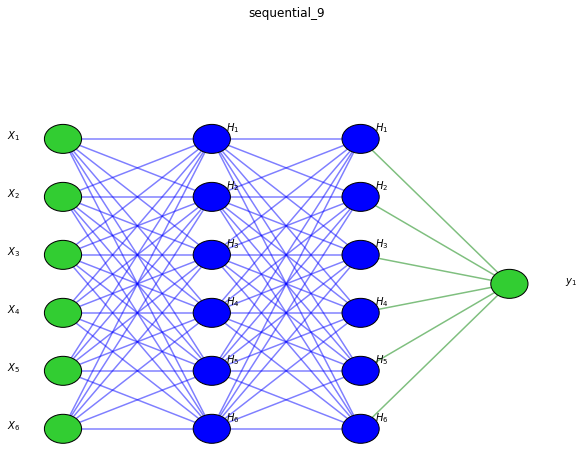

Neural network shape:  3 [6, 6, 6]
Accuracy: 0.8105
48/48 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8105


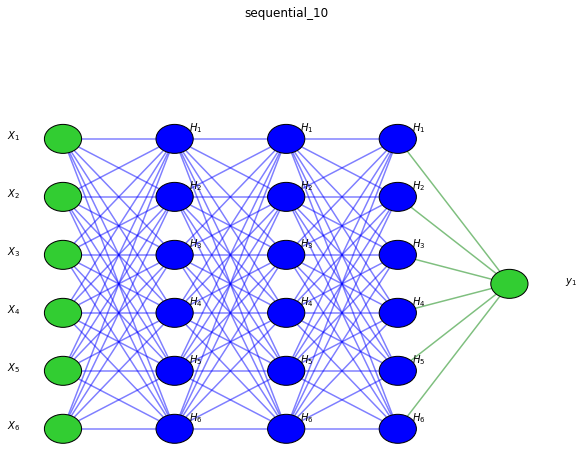

Neural network shape:  3 [6, 6, 5]
Accuracy: 0.8359
48/48 [==============================] - 0s 934us/step - loss: 0.3379 - accuracy: 0.8359


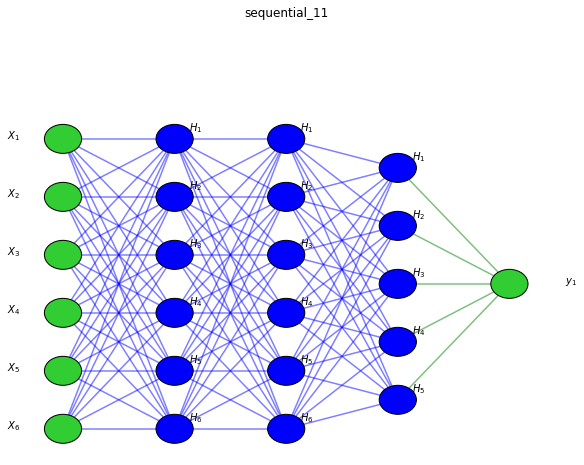

Neural network shape:  4 [6, 6, 6, 6]
Accuracy: 0.8137
48/48 [==============================] - 0s 955us/step - loss: 0.3744 - accuracy: 0.8137


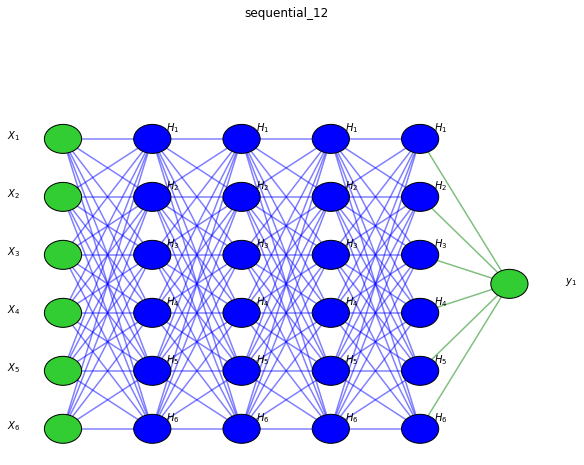

Neural network shape:  4 [6, 6, 6, 5]
Accuracy: 0.8203
48/48 [==============================] - 0s 976us/step - loss: 0.3658 - accuracy: 0.8203


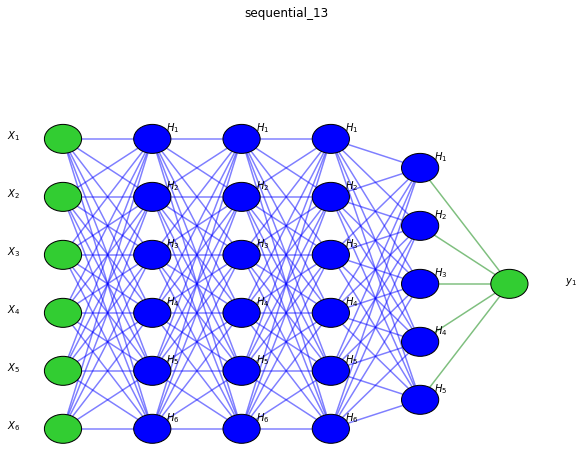

Neural network shape:  4 [6, 6, 5, 5]
Accuracy: 0.8477
48/48 [==============================] - 0s 1ms/step - loss: 0.3200 - accuracy: 0.8477


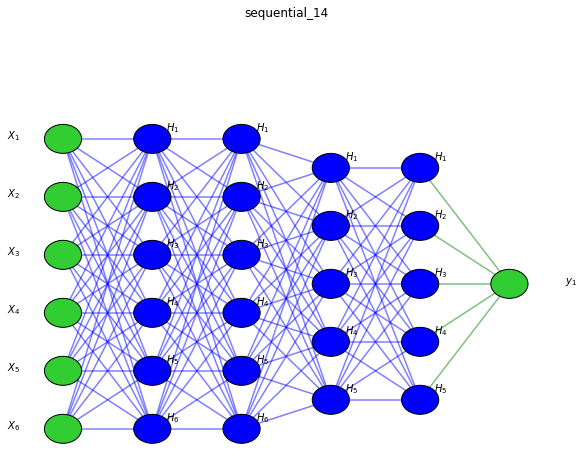

Neural network shape:  5 [6, 6, 6, 6, 6]
Accuracy: 0.8451
48/48 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8451


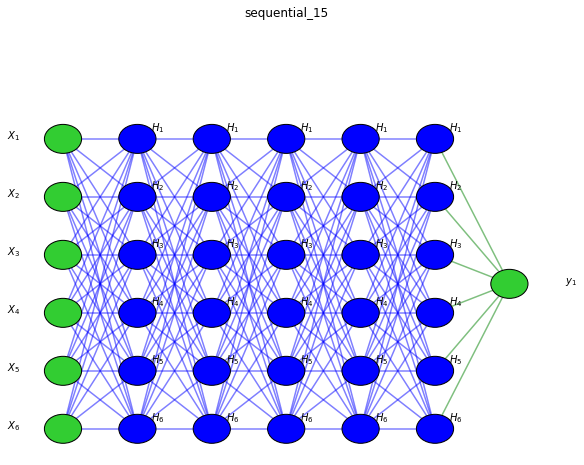

Neural network shape:  5 [6, 6, 6, 6, 5]
Accuracy: 0.8471
48/48 [==============================] - 0s 997us/step - loss: 0.3178 - accuracy: 0.8471


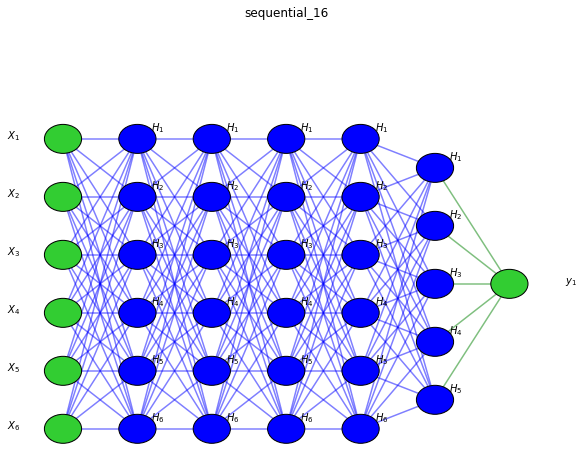

Neural network shape:  5 [6, 6, 6, 5, 5]
Accuracy: 0.8275
48/48 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8275


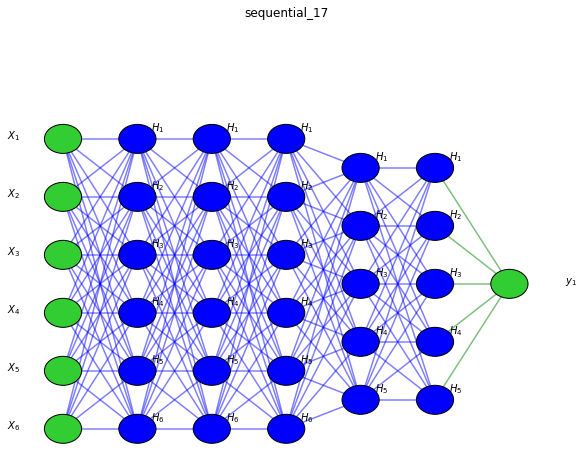

Neural network shape:  6 [6, 6, 6, 6, 6, 6]
Accuracy: 0.8288
48/48 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8288


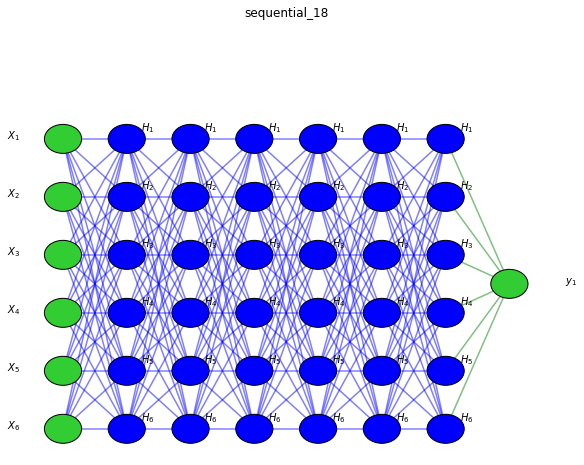

Neural network shape:  6 [6, 6, 6, 6, 6, 5]
Accuracy: 0.8301
48/48 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8301


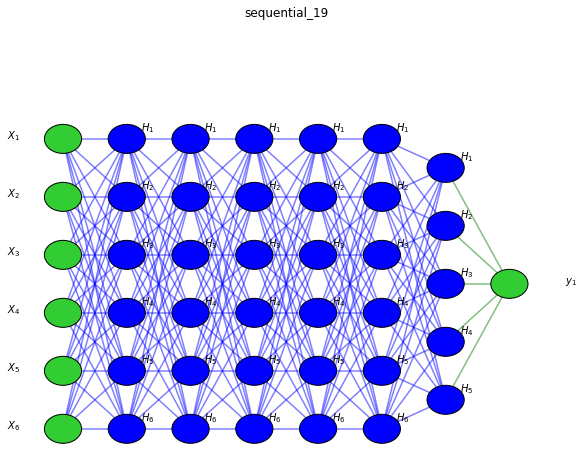

Neural network shape:  6 [6, 6, 6, 6, 5, 5]
Accuracy: 0.8111
48/48 [==============================] - 0s 1ms/step - loss: 0.3784 - accuracy: 0.8111


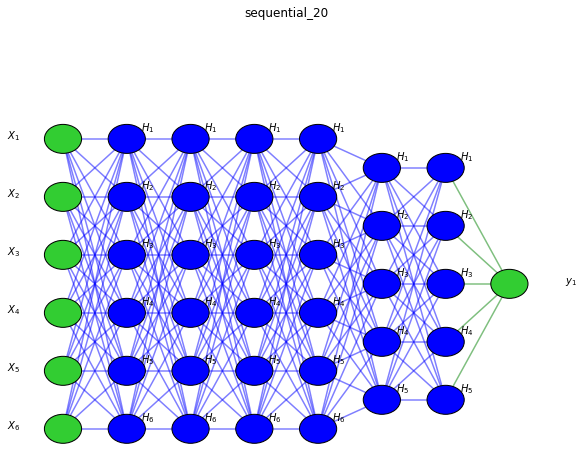

In [17]:
# Training of different neural networks without any regularization
accuracy = []
for shape in NN_architecture:
    print("Neural network shape: ", shape[0], shape[1])
    NN_model = buildNetwork(shape[0], shape[1])
    NN_model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)
    #_, accuracy_val = NN_model.evaluate(X_val, y_val)
    y_pred = np.where(NN_model.predict(X_val) < 0.5, 0, 1)
    print("Accuracy: {:.4f}".format(accuracy_score(y_val, y_pred)))
    NN_model.evaluate(X_val, y_val)
    accuracy.append([shape, accuracy_score(y_val, y_pred)])
    visualize_nn(NN_model)

C:\Users\mussi\AppData\Local\Temp/ipykernel_5660/66014361.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(range(0, len(NN_architecture)), np.array(accuracy)[:, 1])
C:\Users\mussi\AppData\Local\Temp/ipykernel_5660/66014361.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.scatter(range(0, len(NN_architecture)), np.array(accuracy)[:, 1])


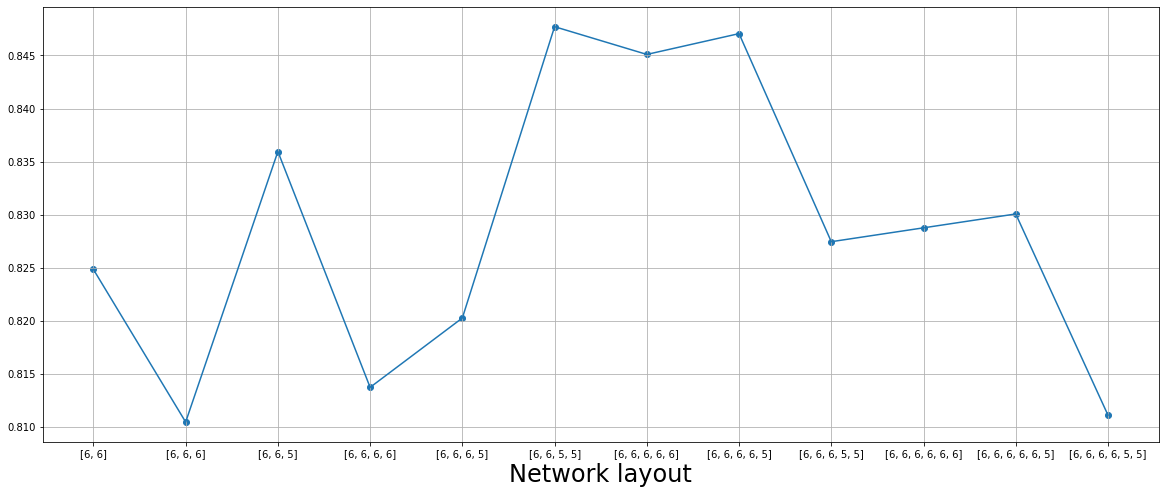

In [18]:
plt.figure(figsize=(20,8))
plt.plot(range(0, len(NN_architecture)), np.array(accuracy)[:, 1])
plt.scatter(range(0, len(NN_architecture)), np.array(accuracy)[:, 1])
plt.xticks(ticks=range(0, len(NN_architecture)), labels=[j for i, j in NN_architecture])
plt.xlabel('Network layout',fontsize=24)
plt.grid()

Neural network shape:  4 [6, 6, 5, 5]
Epoch 1/1000
319/319 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5276
Epoch 2/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.5717
Epoch 3/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.6289
Epoch 4/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.6562
Epoch 5/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.6759
Epoch 6/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.6828
Epoch 7/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.6891
Epoch 8/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.5446 - accuracy: 0.6968
Epoch 9/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.5354 - accuracy: 0.7052
Epoch 10/1000
319/319 [=====================

319/319 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8016
Epoch 157/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.4069 - accuracy: 0.7922
Epoch 158/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.7962
Epoch 159/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.7951
Epoch 160/1000
319/319 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.7960
Epoch 161/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.7923
Epoch 162/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.7957
Epoch 163/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.7991
Epoch 164/1000
319/319 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.7982
Epoch 165/1000
319/319 [==============================] - 0s 1ms/step - loss: 0

319/319 [==============================] - 1s 2ms/step - loss: 0.3674 - accuracy: 0.8152
Epoch 313/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3654 - accuracy: 0.8176
Epoch 314/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3683 - accuracy: 0.8161
Epoch 315/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.8156
Epoch 316/1000
319/319 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8172
Epoch 317/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3722 - accuracy: 0.8150
Epoch 318/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3669 - accuracy: 0.8162
Epoch 319/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8158
Epoch 320/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3629 - accuracy: 0.8179
Epoch 321/1000
319/319 [==============================] - 1s 2ms/step - loss: 0

319/319 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8275
Epoch 469/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3529 - accuracy: 0.8211
Epoch 470/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3503 - accuracy: 0.8261
Epoch 471/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3545 - accuracy: 0.8209
Epoch 472/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3613 - accuracy: 0.8193
Epoch 473/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8210
Epoch 474/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3549 - accuracy: 0.8210
Epoch 475/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3549 - accuracy: 0.8208
Epoch 476/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8201
Epoch 477/1000
319/319 [==============================] - 1s 2ms/step - loss: 0

319/319 [==============================] - 1s 2ms/step - loss: 0.3517 - accuracy: 0.8229
Epoch 625/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3518 - accuracy: 0.8226
Epoch 626/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.8217
Epoch 627/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8249
Epoch 628/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3513 - accuracy: 0.8205
Epoch 629/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8251
Epoch 630/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8288
Epoch 631/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.8242
Epoch 632/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8239
Epoch 633/1000
319/319 [==============================] - 1s 2ms/step - loss: 0

319/319 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8217
Epoch 781/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8242
Epoch 782/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8236
Epoch 783/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8255
Epoch 784/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8237
Epoch 785/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3516 - accuracy: 0.8236
Epoch 786/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8223: 0s - loss: 0.342
Epoch 787/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8259
Epoch 788/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.8260
Epoch 789/1000
319/319 [==============================] - 1s 

319/319 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8283
Epoch 937/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8249
Epoch 938/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8258
Epoch 939/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8265
Epoch 940/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8245
Epoch 941/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.8257
Epoch 942/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8257
Epoch 943/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8287
Epoch 944/1000
319/319 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8246: 0s - loss: 0.3426 
Epoch 945/1000
319/319 [==============================] - 1

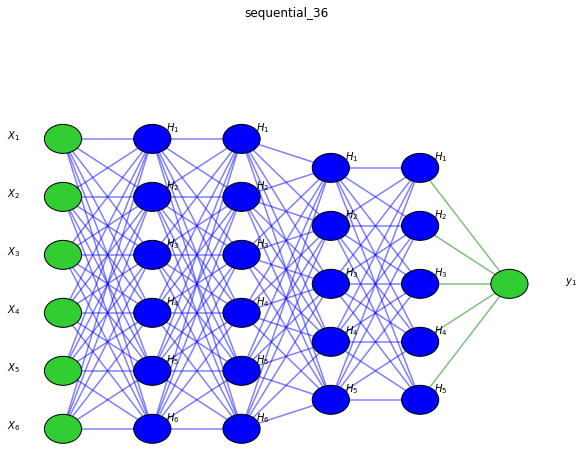

In [23]:
print("Neural network shape: ", 4, [6, 6, 5, 5])
NN_model = buildNetwork(4, [6, 6, 5, 5])
NN_model.fit(X_training_scaled, y_2c_training, epochs=1000, batch_size=32, verbose=1)
visualize_nn(NN_model)

In [13]:
# To print the neural network

def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers


'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

## Testing